In [1]:
# from app.prepare_data import pipeline

# pipeline()

In [2]:
import glob
target = glob.glob('data/preprocessed/test/images/*')[:]
target

['data/preprocessed/test/images/wts-lg-000123.jpg',
 'data/preprocessed/test/images/wts-lg-000095.jpg',
 'data/preprocessed/test/images/OUH9191.jpg',
 'data/preprocessed/test/images/OYJ9557.jpg',
 'data/preprocessed/test/images/wts-lg-000055.jpg',
 'data/preprocessed/test/images/wts-lg-000041.jpg',
 'data/preprocessed/test/images/wts-lg-000135.jpg',
 'data/preprocessed/test/images/wts-lg-000125.jpg',
 'data/preprocessed/test/images/wts-lg-000119.jpg',
 'data/preprocessed/test/images/wts-lg-000079.jpg',
 'data/preprocessed/test/images/NZW2197.jpg',
 'data/preprocessed/test/images/test_028.jpg',
 'data/preprocessed/test/images/wts-lg-000118.jpg',
 'data/preprocessed/test/images/NYY1710.jpg',
 'data/preprocessed/test/images/wts-lg-000127.jpg',
 'data/preprocessed/test/images/wts-lg-000197.jpg',
 'data/preprocessed/test/images/us6.jpg',
 'data/preprocessed/test/images/wts-lg-000141.jpg',
 'data/preprocessed/test/images/wts-lg-000194.jpg',
 'data/preprocessed/test/images/MYX3152.jpg',
 'dat

In [3]:
from app.helpers import get_label_paths, get_LP

annots = get_label_paths(target)
GTS = get_LP(annots)
GTS

['6XIU641',
 '4FCW533',
 'OUH9191',
 'OYJ9557',
 'TRZ951',
 '5LTA600',
 'CWM3083',
 '5TQY867',
 '6RJN062',
 'FD7U4U',
 'NZW2197',
 'LM633BD',
 '853FL',
 'NYY1710',
 '5AZL613',
 '2MFZ746',
 'HL0KTY1',
 '1365847',
 '7CID930',
 'MYX3152',
 'PJF4224',
 'TTP488',
 'PH5M9Y',
 'RK735AS',
 'PYB6477',
 '4KBZ265',
 'ZA834CO',
 'MT456BJ',
 'EUS664',
 'OZS6477',
 'RZN384',
 'BA302OZ',
 '75061H1',
 'RK376AF',
 'PXP8172',
 '378DXR',
 'BB135BO',
 'OKP7250',
 'NZP8292',
 'OZL2318',
 'DL3C2Z',
 'OUW5216',
 'EAZ6913',
 'J868321',
 'BA268IM',
 'CWM2998',
 'NYI3834',
 'M5XSX',
 'OZK6717',
 'CGT2069',
 'FB5X8T',
 'OKT3896',
 'PJI5921',
 '8FV480',
 'RKO82AL',
 'PJF5797',
 'OKM2371',
 'RK896AO',
 'JIT7463',
 'RK884AL',
 'NTO1053',
 'RK906AJ',
 'PAG5219',
 'JST2699',
 'BA738DE',
 'RK612AL',
 '5VDA555',
 'UG9L8U']

In [4]:
# from app.model import inference_pipe

# _, ocr_res, cropped = inference_pipe(target, return_cropped_images=True)

In [5]:
from app.model import get_detection_model

yolo_model = get_detection_model()

INFO:app.logger_config:Loading detection model from models/best_v10n_2.pt


In [6]:
yolo_model.val(data="data/preprocessed/data.yaml", split="test")

Ultralytics YOLOv8.1.34 🚀 Python-3.10.6 torch-2.3.1 CPU (Apple M1)
YOLOv10n summary (fused): 285 layers, 2695196 parameters, 0 gradients, 8.2 GFLOPs


val: Scanning /Users/noornizar/Documents/ALPR_/data/preprocessed/test/labels... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<00:00, 2205.29it/s]

val: New cache created: /Users/noornizar/Documents/ALPR_/data/preprocessed/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


                   all         68         68      0.938      0.892      0.963      0.847
         license plate         68         68      0.938      0.892      0.963      0.847
Speed: 1.7ms preprocess, 275.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val47


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x176b26d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

In [7]:
from app.model import predict_single_sample
from app.model import inference_pipe
from app.model import ocr_easy_interface, ocr_llm_interface

out = inference_pipe(target, predict_single_sample, ocr_easy_interface,
                      return_cropped_images=True, device='cpu')

INFO:app.logger_config:Loading detection model
INFO:app.logger_config:Loading detection model from models/best_v10n_2.pt
INFO:app.logger_config:Detection model loaded and moved to device
INFO:app.logger_config:Loading OCR model and processor
/opt/homebrew/Caskroom/miniforge/base/envs/mtpqt/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['decoder.output_projection.weight', 'encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:app.logger_config:OCR model loaded
INFO:app.logger_config:OCR model and pro


0: 384x640 1 license plate, 137.3ms
Speed: 21.9ms preprocess, 137.3ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)


  1%|▏         | 1/68 [00:02<03:06,  2.78s/it]


0: 416x640 1 license plate, 107.5ms
Speed: 3.0ms preprocess, 107.5ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


  3%|▎         | 2/68 [00:02<01:22,  1.25s/it]


0: 384x640 2 license plates, 86.9ms
Speed: 1.4ms preprocess, 86.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 3/68 [00:03<01:00,  1.08it/s]


0: 480x640 1 license plate, 125.4ms
Speed: 2.8ms preprocess, 125.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


  6%|▌         | 4/68 [00:04<00:52,  1.21it/s]


0: 384x640 1 license plate, 499.8ms
Speed: 1.7ms preprocess, 499.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 5/68 [00:04<00:50,  1.24it/s]


0: 416x640 1 license plate, 128.7ms
Speed: 1.9ms preprocess, 128.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)


  9%|▉         | 6/68 [00:05<00:39,  1.58it/s]


0: 384x640 1 license plate, 117.7ms
Speed: 1.0ms preprocess, 117.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


 10%|█         | 7/68 [00:05<00:33,  1.80it/s]


0: 384x640 1 license plate, 96.9ms
Speed: 1.1ms preprocess, 96.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 8/68 [00:05<00:25,  2.33it/s]


0: 384x640 1 license plate, 160.4ms
Speed: 1.2ms preprocess, 160.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 9/68 [00:06<00:21,  2.74it/s]


0: 384x640 1 license plate, 79.7ms
Speed: 1.2ms preprocess, 79.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 10/68 [00:06<00:17,  3.37it/s]


0: 640x640 1 license plate, 130.9ms
Speed: 2.2ms preprocess, 130.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 11/68 [00:06<00:20,  2.81it/s]


0: 480x640 1 license plate, 158.8ms
Speed: 1.4ms preprocess, 158.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 18%|█▊        | 12/68 [00:07<00:22,  2.49it/s]


0: 384x640 1 license plate, 91.9ms
Speed: 1.6ms preprocess, 91.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 13/68 [00:07<00:18,  2.97it/s]


0: 384x640 1 license plate, 112.2ms
Speed: 1.3ms preprocess, 112.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 14/68 [00:07<00:16,  3.24it/s]


0: 384x640 1 license plate, 116.7ms
Speed: 1.6ms preprocess, 116.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 15/68 [00:07<00:14,  3.71it/s]


0: 384x640 2 license plates, 120.5ms
Speed: 1.4ms preprocess, 120.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▎       | 16/68 [00:07<00:12,  4.13it/s]


0: 544x640 3 license plates, 129.4ms
Speed: 2.0ms preprocess, 129.4ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)


 25%|██▌       | 17/68 [00:08<00:15,  3.21it/s]


0: 384x640 1 license plate, 114.8ms
Speed: 1.4ms preprocess, 114.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▋       | 18/68 [00:08<00:13,  3.72it/s]


0: 384x640 1 license plate, 79.0ms
Speed: 3.6ms preprocess, 79.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 19/68 [00:08<00:11,  4.36it/s]


0: 640x640 2 license plates, 107.8ms
Speed: 1.9ms preprocess, 107.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 20/68 [00:08<00:11,  4.19it/s]


0: 640x640 1 license plate, 181.5ms
Speed: 7.6ms preprocess, 181.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 21/68 [00:09<00:19,  2.42it/s]


0: 416x640 2 license plates, 120.9ms
Speed: 2.6ms preprocess, 120.9ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


 32%|███▏      | 22/68 [00:09<00:15,  2.90it/s]


0: 384x640 1 license plate, 97.2ms
Speed: 2.0ms preprocess, 97.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 23/68 [00:10<00:13,  3.43it/s]


0: 480x640 1 license plate, 118.4ms
Speed: 1.7ms preprocess, 118.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▌      | 24/68 [00:10<00:15,  2.89it/s]


0: 640x640 1 license plate, 177.2ms
Speed: 2.6ms preprocess, 177.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 25/68 [00:10<00:14,  2.98it/s]


0: 384x640 1 license plate, 105.7ms
Speed: 2.8ms preprocess, 105.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 26/68 [00:11<00:12,  3.48it/s]


0: 512x640 1 license plate, 133.7ms
Speed: 3.6ms preprocess, 133.7ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)


 40%|███▉      | 27/68 [00:11<00:14,  2.81it/s]


0: 416x640 1 license plate, 230.9ms
Speed: 1.5ms preprocess, 230.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


 41%|████      | 28/68 [00:11<00:13,  2.95it/s]


0: 480x640 1 license plate, 231.7ms
Speed: 1.4ms preprocess, 231.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 29/68 [00:12<00:13,  2.98it/s]


0: 640x640 1 license plate, 367.3ms
Speed: 4.8ms preprocess, 367.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 30/68 [00:12<00:15,  2.46it/s]


0: 384x640 1 license plate, 171.1ms
Speed: 5.0ms preprocess, 171.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 31/68 [00:13<00:18,  2.00it/s]


0: 608x640 1 license plate, 225.7ms
Speed: 13.4ms preprocess, 225.7ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 640)


 47%|████▋     | 32/68 [00:13<00:16,  2.24it/s]


0: 384x640 1 license plate, 169.8ms
Speed: 3.2ms preprocess, 169.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▊     | 33/68 [00:14<00:13,  2.55it/s]


0: 512x640 1 license plate, 172.1ms
Speed: 1.8ms preprocess, 172.1ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)


 50%|█████     | 34/68 [00:14<00:11,  2.90it/s]


0: 640x640 1 license plate, 160.0ms
Speed: 2.1ms preprocess, 160.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 35/68 [00:14<00:13,  2.48it/s]


0: 448x640 2 license plates, 118.7ms
Speed: 10.0ms preprocess, 118.7ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 53%|█████▎    | 36/68 [00:15<00:14,  2.27it/s]


0: 576x640 1 license plate, 158.7ms
Speed: 3.2ms preprocess, 158.7ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 640)


 54%|█████▍    | 37/68 [00:15<00:11,  2.67it/s]


0: 640x640 1 license plate, 144.8ms
Speed: 4.8ms preprocess, 144.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 38/68 [00:15<00:10,  2.85it/s]


0: 640x640 2 license plates, 220.1ms
Speed: 3.4ms preprocess, 220.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 39/68 [00:16<00:13,  2.21it/s]


0: 640x640 2 license plates, 150.9ms
Speed: 2.8ms preprocess, 150.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 40/68 [00:16<00:11,  2.42it/s]


0: 384x640 2 license plates, 91.1ms
Speed: 1.1ms preprocess, 91.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 60%|██████    | 41/68 [00:17<00:09,  2.99it/s]


0: 384x640 1 license plate, 87.7ms
Speed: 1.3ms preprocess, 87.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 42/68 [00:17<00:07,  3.42it/s]


0: 480x640 1 license plate, 97.4ms
Speed: 2.5ms preprocess, 97.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 63%|██████▎   | 43/68 [00:18<00:13,  1.79it/s]


0: 384x640 2 license plates, 117.5ms
Speed: 1.3ms preprocess, 117.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▍   | 44/68 [00:18<00:11,  2.17it/s]


0: 224x640 1 license plate, 80.6ms
Speed: 1.9ms preprocess, 80.6ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 640)


 66%|██████▌   | 45/68 [00:18<00:08,  2.74it/s]


0: 384x640 1 license plate, 88.7ms
Speed: 1.3ms preprocess, 88.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 46/68 [00:19<00:08,  2.56it/s]


0: 640x640 1 license plate, 166.8ms
Speed: 1.9ms preprocess, 166.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 47/68 [00:19<00:07,  2.69it/s]


0: 480x640 1 license plate, 114.4ms
Speed: 2.7ms preprocess, 114.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 71%|███████   | 48/68 [00:20<00:08,  2.29it/s]


0: 640x640 1 license plate, 108.8ms
Speed: 4.8ms preprocess, 108.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 49/68 [00:20<00:07,  2.64it/s]


0: 384x640 1 license plate, 98.8ms
Speed: 2.8ms preprocess, 98.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▎  | 50/68 [00:20<00:06,  2.98it/s]


0: 384x640 2 license plates, 101.3ms
Speed: 1.3ms preprocess, 101.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▌  | 51/68 [00:20<00:04,  3.53it/s]


0: 640x640 1 license plate, 125.2ms
Speed: 3.4ms preprocess, 125.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 52/68 [00:21<00:04,  3.68it/s]


0: 640x640 1 license plate, 150.3ms
Speed: 4.3ms preprocess, 150.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 53/68 [00:21<00:04,  3.64it/s]


0: 384x640 1 license plate, 95.1ms
Speed: 1.6ms preprocess, 95.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 54/68 [00:21<00:03,  4.02it/s]


0: 480x640 1 license plate, 166.9ms
Speed: 1.7ms preprocess, 166.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 81%|████████  | 55/68 [00:21<00:03,  4.17it/s]


0: 640x640 2 license plates, 138.3ms
Speed: 1.9ms preprocess, 138.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 56/68 [00:22<00:02,  4.07it/s]


0: 640x640 1 license plate, 112.9ms
Speed: 2.0ms preprocess, 112.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 57/68 [00:22<00:02,  4.18it/s]


0: 576x640 1 license plate, 109.8ms
Speed: 2.4ms preprocess, 109.8ms inference, 0.4ms postprocess per image at shape (1, 3, 576, 640)


 85%|████████▌ | 58/68 [00:22<00:02,  4.69it/s]


0: 640x384 1 license plate, 96.2ms
Speed: 1.5ms preprocess, 96.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)


 87%|████████▋ | 59/68 [00:22<00:01,  5.15it/s]


0: 512x640 (no detections), 93.5ms
Speed: 1.8ms preprocess, 93.5ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)


 88%|████████▊ | 60/68 [00:22<00:01,  6.02it/s]


0: 640x640 1 license plate, 108.0ms
Speed: 2.0ms preprocess, 108.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 61/68 [00:22<00:01,  4.88it/s]


0: 544x640 (no detections), 94.4ms
Speed: 1.5ms preprocess, 94.4ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)


 91%|█████████ | 62/68 [00:23<00:01,  5.72it/s]


0: 384x640 1 license plate, 89.9ms
Speed: 1.6ms preprocess, 89.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 63/68 [00:23<00:00,  5.54it/s]


0: 640x640 1 license plate, 141.6ms
Speed: 1.8ms preprocess, 141.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 64/68 [00:23<00:01,  3.45it/s]


0: 480x640 1 license plate, 104.0ms
Speed: 1.6ms preprocess, 104.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


 96%|█████████▌| 65/68 [00:23<00:00,  4.00it/s]


0: 608x640 2 license plates, 182.9ms
Speed: 1.9ms preprocess, 182.9ms inference, 0.4ms postprocess per image at shape (1, 3, 608, 640)


 97%|█████████▋| 66/68 [00:24<00:00,  4.07it/s]


0: 384x640 1 license plate, 93.1ms
Speed: 1.4ms preprocess, 93.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▊| 67/68 [00:24<00:00,  4.57it/s]


0: 384x640 1 license plate, 85.9ms
Speed: 3.1ms preprocess, 85.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


100%|██████████| 68/68 [00:24<00:00,  2.77it/s]
INFO:app.logger_config:Inference completed


In [8]:
out_lp = out[0]
print(len(out_lp))
out_lp


68


['6Xiu641]',
 'Leci533',
 'ouh 9191',
 'OYJ9557',
 'Tri 05/',
 '51',
 'TEXAS',
 '5Toy867',
 '6RJND62]',
 '04U',
 'NZV2197',
 '[633B0]',
 '1853FL"',
 'NYY./710',
 '5AZL613',
 'ZHFZ7L6',
 'HLO KTYI',
 '1365847',
 '7CID930',
 'Myx3152',
 'PJF 4224',
 'TP_488',
 'Prks K9y',
 'RKe735AS',
 'PYB 6477',
 'LKBz265',
 'ILIcO',
 'MT-456B',
 'EUSm664',
 '0z5 6477',
 'RZN 384 ',
 'B13o202',
 '75061h1',
 'ERKC3764F',
 'PXP8172',
 '378 DXRI',
 'BBF 135B0',
 'OKP:7250',
 'NZP 8292',
 '02152318',
 'DL3EC2I',
 'ouk:5246',
 'THE EMPIRE STATE',
 '4B6 8Z',
 'EBAE268IM',
 'TEXAS',
 'NY/ 3834',
 'M5-XSX',
 'Ozk67.17',
 'TEXAS',
 'FFbs XeT',
 "OKT'3896",
 'PJI 5921',
 '8FV-480',
 'ERK 08244',
 'PJE. 5797',
 '2371',
 'RKa89640',
 'T*7463',
 'no_detect',
 'Nto.1053',
 'no_detect',
 'PAG 5219',
 'JST.2699',
 'PBA Z38E',
 'RK-612AL',
 'svdA555|',
 '0G9 Leu']

In [9]:
from app.model import character_error_rate

character_error_rate(GTS, out_lp)

0.455531453362256

In [10]:
from app.model import predict_single_sample
from app.model import inference_pipe
from app.model import ocr_easy_interface, ocr_llm_interface

out = inference_pipe(target, predict_single_sample, ocr_llm_interface,
                      return_cropped_images=True, device='cpu')

out_lp = out[0]
print(len(out_lp))
out_lp


INFO:app.logger_config:Loading detection model
INFO:app.logger_config:Loading detection model from models/best_v10n_2.pt
INFO:app.logger_config:Detection model loaded and moved to device
INFO:app.logger_config:Loading OCR model and processor
/opt/homebrew/Caskroom/miniforge/base/envs/mtpqt/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['decoder.output_projection.weight', 'encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:app.logger_config:OCR model loaded
INFO:app.logger_config:OCR model and pro


0: 384x640 1 license plate, 120.6ms
Speed: 9.3ms preprocess, 120.6ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)


/opt/homebrew/Caskroom/miniforge/base/envs/mtpqt/lib/python3.10/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
  1%|▏         | 1/68 [00:01<02:08,  1.92s/it]


0: 416x640 1 license plate, 87.5ms
Speed: 5.3ms preprocess, 87.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


  3%|▎         | 2/68 [00:03<01:34,  1.44s/it]


0: 384x640 2 license plates, 75.4ms
Speed: 1.1ms preprocess, 75.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 3/68 [00:04<01:26,  1.33s/it]


0: 480x640 1 license plate, 102.0ms
Speed: 1.7ms preprocess, 102.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


  6%|▌         | 4/68 [00:05<01:23,  1.30s/it]


0: 384x640 1 license plate, 71.5ms
Speed: 2.4ms preprocess, 71.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 5/68 [00:06<01:17,  1.23s/it]


0: 416x640 1 license plate, 80.7ms
Speed: 1.9ms preprocess, 80.7ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


  9%|▉         | 6/68 [00:07<01:17,  1.24s/it]


0: 384x640 1 license plate, 71.6ms
Speed: 1.9ms preprocess, 71.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


 10%|█         | 7/68 [00:09<01:18,  1.28s/it]


0: 384x640 1 license plate, 81.5ms
Speed: 1.3ms preprocess, 81.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 8/68 [00:10<01:20,  1.34s/it]


0: 384x640 1 license plate, 93.2ms
Speed: 1.2ms preprocess, 93.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 9/68 [00:12<01:22,  1.39s/it]


0: 384x640 1 license plate, 94.5ms
Speed: 1.5ms preprocess, 94.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 10/68 [00:14<01:29,  1.54s/it]


0: 640x640 1 license plate, 209.9ms
Speed: 9.7ms preprocess, 209.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 11/68 [00:16<01:51,  1.95s/it]


0: 480x640 1 license plate, 212.3ms
Speed: 7.5ms preprocess, 212.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 18%|█▊        | 12/68 [00:18<01:49,  1.96s/it]


0: 384x640 1 license plate, 115.8ms
Speed: 1.9ms preprocess, 115.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 13/68 [00:20<01:38,  1.78s/it]


0: 384x640 1 license plate, 95.3ms
Speed: 3.8ms preprocess, 95.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 14/68 [00:21<01:33,  1.73s/it]


0: 384x640 1 license plate, 176.3ms
Speed: 1.3ms preprocess, 176.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 15/68 [00:23<01:34,  1.78s/it]


0: 384x640 2 license plates, 154.9ms
Speed: 1.7ms preprocess, 154.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▎       | 16/68 [00:25<01:38,  1.89s/it]


0: 544x640 3 license plates, 117.5ms
Speed: 4.8ms preprocess, 117.5ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)


 25%|██▌       | 17/68 [00:27<01:31,  1.79s/it]


0: 384x640 1 license plate, 79.2ms
Speed: 4.6ms preprocess, 79.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▋       | 18/68 [00:28<01:17,  1.56s/it]


0: 384x640 1 license plate, 80.6ms
Speed: 3.2ms preprocess, 80.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 19/68 [00:29<01:10,  1.45s/it]


0: 640x640 2 license plates, 106.8ms
Speed: 2.0ms preprocess, 106.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 20/68 [00:30<01:05,  1.36s/it]


0: 640x640 1 license plate, 101.5ms
Speed: 3.3ms preprocess, 101.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 21/68 [00:32<01:03,  1.35s/it]


0: 416x640 2 license plates, 89.9ms
Speed: 1.7ms preprocess, 89.9ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


 32%|███▏      | 22/68 [00:33<01:00,  1.31s/it]


0: 384x640 1 license plate, 86.0ms
Speed: 1.3ms preprocess, 86.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 23/68 [00:34<01:00,  1.35s/it]


0: 480x640 1 license plate, 104.0ms
Speed: 1.6ms preprocess, 104.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▌      | 24/68 [00:36<01:02,  1.42s/it]


0: 640x640 1 license plate, 104.8ms
Speed: 1.9ms preprocess, 104.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 25/68 [00:38<01:03,  1.47s/it]


0: 384x640 1 license plate, 84.4ms
Speed: 1.4ms preprocess, 84.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 26/68 [00:39<00:58,  1.38s/it]


0: 512x640 1 license plate, 111.8ms
Speed: 1.6ms preprocess, 111.8ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)


 40%|███▉      | 27/68 [00:40<00:57,  1.40s/it]


0: 416x640 1 license plate, 81.8ms
Speed: 1.3ms preprocess, 81.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


 41%|████      | 28/68 [00:42<00:56,  1.42s/it]


0: 480x640 1 license plate, 123.3ms
Speed: 0.9ms preprocess, 123.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 29/68 [00:43<00:58,  1.51s/it]


0: 640x640 1 license plate, 147.1ms
Speed: 3.3ms preprocess, 147.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 30/68 [00:45<01:02,  1.65s/it]


0: 384x640 1 license plate, 226.1ms
Speed: 1.7ms preprocess, 226.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 31/68 [00:47<01:00,  1.65s/it]


0: 608x640 1 license plate, 115.4ms
Speed: 2.2ms preprocess, 115.4ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 640)


 47%|████▋     | 32/68 [00:48<00:55,  1.54s/it]


0: 384x640 1 license plate, 92.9ms
Speed: 1.2ms preprocess, 92.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▊     | 33/68 [00:50<00:52,  1.49s/it]


0: 512x640 1 license plate, 138.2ms
Speed: 2.1ms preprocess, 138.2ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)


 50%|█████     | 34/68 [00:51<00:50,  1.50s/it]


0: 640x640 1 license plate, 135.7ms
Speed: 2.6ms preprocess, 135.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 35/68 [00:53<00:49,  1.51s/it]


0: 448x640 2 license plates, 136.3ms
Speed: 2.0ms preprocess, 136.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


 53%|█████▎    | 36/68 [00:54<00:46,  1.46s/it]


0: 576x640 1 license plate, 239.8ms
Speed: 2.2ms preprocess, 239.8ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 640)


 54%|█████▍    | 37/68 [00:56<00:48,  1.55s/it]


0: 640x640 1 license plate, 278.7ms
Speed: 11.1ms preprocess, 278.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 38/68 [00:58<00:54,  1.82s/it]


0: 640x640 2 license plates, 119.0ms
Speed: 5.4ms preprocess, 119.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 39/68 [01:00<00:52,  1.81s/it]


0: 640x640 2 license plates, 144.3ms
Speed: 2.0ms preprocess, 144.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 40/68 [01:02<00:48,  1.75s/it]


0: 384x640 2 license plates, 113.7ms
Speed: 2.0ms preprocess, 113.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 60%|██████    | 41/68 [01:04<00:50,  1.89s/it]


0: 384x640 1 license plate, 106.5ms
Speed: 2.3ms preprocess, 106.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 42/68 [01:06<00:47,  1.83s/it]


0: 480x640 1 license plate, 103.4ms
Speed: 3.2ms preprocess, 103.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 63%|██████▎   | 43/68 [01:07<00:43,  1.74s/it]


0: 384x640 2 license plates, 125.6ms
Speed: 2.8ms preprocess, 125.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▍   | 44/68 [01:09<00:42,  1.79s/it]


0: 224x640 1 license plate, 82.3ms
Speed: 2.4ms preprocess, 82.3ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 640)


 66%|██████▌   | 45/68 [01:11<00:40,  1.75s/it]


0: 384x640 1 license plate, 95.3ms
Speed: 6.9ms preprocess, 95.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 46/68 [01:12<00:35,  1.63s/it]


0: 640x640 1 license plate, 166.9ms
Speed: 5.6ms preprocess, 166.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 47/68 [01:13<00:33,  1.59s/it]


0: 480x640 1 license plate, 117.2ms
Speed: 3.0ms preprocess, 117.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


 71%|███████   | 48/68 [01:16<00:36,  1.82s/it]


0: 640x640 1 license plate, 129.2ms
Speed: 3.5ms preprocess, 129.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 49/68 [01:18<00:34,  1.83s/it]


0: 384x640 1 license plate, 83.1ms
Speed: 1.4ms preprocess, 83.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▎  | 50/68 [01:19<00:30,  1.67s/it]


0: 384x640 2 license plates, 76.8ms
Speed: 1.4ms preprocess, 76.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▌  | 51/68 [01:20<00:26,  1.56s/it]


0: 640x640 1 license plate, 137.0ms
Speed: 2.4ms preprocess, 137.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 52/68 [01:21<00:23,  1.45s/it]


0: 640x640 1 license plate, 106.1ms
Speed: 3.0ms preprocess, 106.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 53/68 [01:23<00:21,  1.45s/it]


0: 384x640 1 license plate, 117.5ms
Speed: 10.9ms preprocess, 117.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 54/68 [01:24<00:20,  1.44s/it]


0: 480x640 1 license plate, 98.2ms
Speed: 1.4ms preprocess, 98.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 81%|████████  | 55/68 [01:26<00:18,  1.42s/it]


0: 640x640 2 license plates, 104.6ms
Speed: 3.0ms preprocess, 104.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 56/68 [01:27<00:16,  1.37s/it]


0: 640x640 1 license plate, 144.2ms
Speed: 3.5ms preprocess, 144.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 57/68 [01:28<00:15,  1.37s/it]


0: 576x640 1 license plate, 113.3ms
Speed: 2.1ms preprocess, 113.3ms inference, 0.4ms postprocess per image at shape (1, 3, 576, 640)


 85%|████████▌ | 58/68 [01:30<00:13,  1.35s/it]


0: 640x384 1 license plate, 83.1ms
Speed: 1.7ms preprocess, 83.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)


 87%|████████▋ | 59/68 [01:31<00:11,  1.27s/it]


0: 512x640 (no detections), 173.4ms
Speed: 1.4ms preprocess, 173.4ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)


 88%|████████▊ | 60/68 [01:31<00:07,  1.06it/s]


0: 640x640 1 license plate, 108.5ms
Speed: 1.9ms preprocess, 108.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 61/68 [01:32<00:07,  1.05s/it]


0: 544x640 (no detections), 98.7ms
Speed: 1.9ms preprocess, 98.7ms inference, 0.6ms postprocess per image at shape (1, 3, 544, 640)


 91%|█████████ | 62/68 [01:32<00:04,  1.30it/s]


0: 384x640 1 license plate, 87.5ms
Speed: 1.6ms preprocess, 87.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 63/68 [01:34<00:05,  1.01s/it]


0: 640x640 1 license plate, 162.1ms
Speed: 9.1ms preprocess, 162.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 64/68 [01:35<00:04,  1.13s/it]


0: 480x640 1 license plate, 91.4ms
Speed: 1.5ms preprocess, 91.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


 96%|█████████▌| 65/68 [01:37<00:03,  1.20s/it]


0: 608x640 2 license plates, 140.1ms
Speed: 1.7ms preprocess, 140.1ms inference, 0.4ms postprocess per image at shape (1, 3, 608, 640)


 97%|█████████▋| 66/68 [01:38<00:02,  1.31s/it]


0: 384x640 1 license plate, 92.3ms
Speed: 1.5ms preprocess, 92.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▊| 67/68 [01:39<00:01,  1.27s/it]


0: 384x640 1 license plate, 77.5ms
Speed: 1.4ms preprocess, 77.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


100%|██████████| 68/68 [01:41<00:00,  1.49s/it]
INFO:app.logger_config:Inference completed


68


['6XIU641',
 'LFCN533',
 'DUH 9191',
 'OYJ-9557',
 'TRZ 951',
 '5LTA6MM',
 'CWM-3083',
 '5TOY867',
 '6R,IN062',
 'FD7.040',
 'NZW-2197',
 'LLM 633BD',
 '@853FL',
 'NYY-1710',
 '5AZL613',
 '2MFZ746',
 'HLO KTYI,',
 '1365847',
 '7CID930',
 'MYX 3152',
 'PJF 4224',
 'TTP 488',
 'PH5-M9Y',
 '-RK:735AS',
 'PYB-6477',
 '4KBZ265',
 'ZA-83400',
 '.MT-456BJ',
 'EUS*664',
 'OZS-6477',
 'RZN 384',
 'BA*3020Z',
 '75061H1',
 '@RK:376AF',
 'PXP-8172',
 '378 DXR',
 '-BB:135BO',
 'OKP.7250',
 'NZP-8292',
 'OZL 2318',
 'DL3 C2Z',
 'DUW.5216',
 'EAZ-6913',
 '186-8321',
 'BAE268IM',
 'CWM-2998',
 'NYI 3834',
 '6 M5-XSX',
 'OZK.6717',
 'CGT-2069',
 'FB5 X8T',
 'OKT 3896',
 'PJI-5921',
 '8FV-480',
 'SRK-082AL',
 'PJF 5797',
 'OKM-2371',
 'MRK:89640',
 'JIT 7463',
 'no_detect',
 'NTO-1053',
 'no_detect',
 'PAG-5219',
 'JST 2699',
 '*BA*738DE',
 'SRK-612AL',
 '5VDA555',
 'UG9-L8U']

In [11]:
from app.model import character_error_rate

character_error_rate(GTS, out_lp)

0.22559652928416485

In [15]:
from PIL import Image
sample_im = Image.open(target[2])

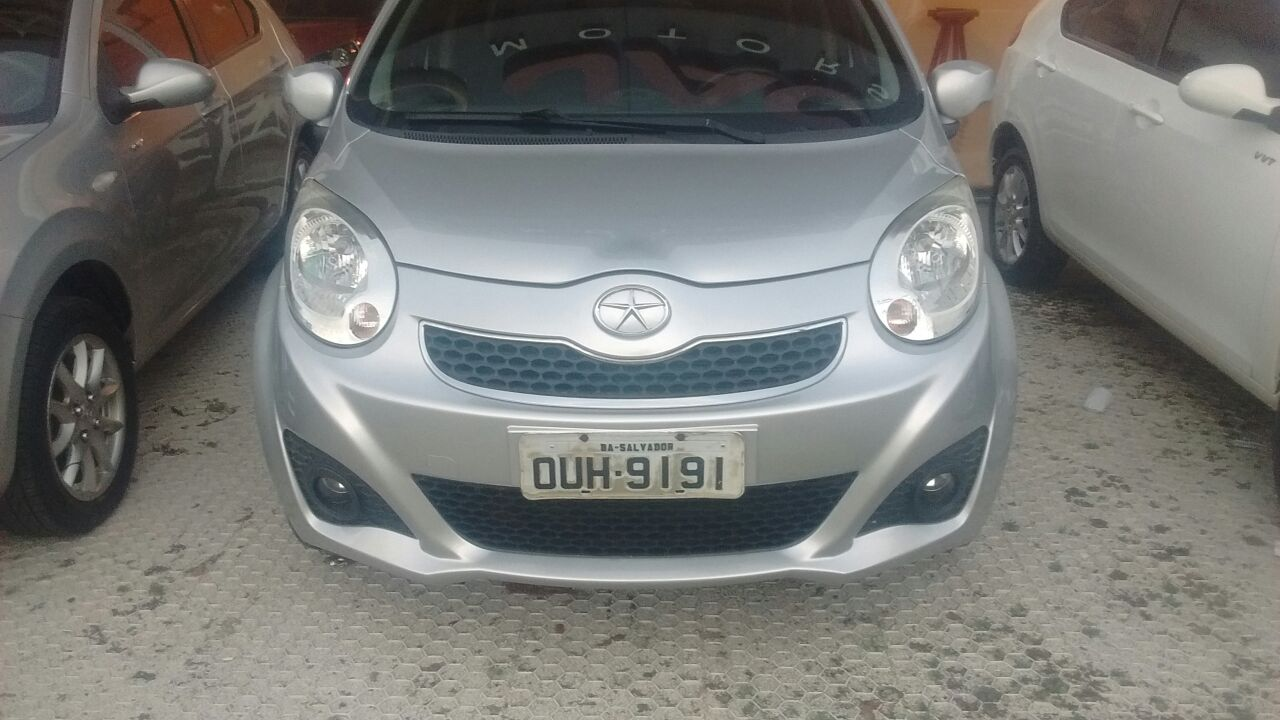

In [63]:
sample_im

In [69]:
sample_out = yolo_model.predict(target[2], iou=0.5)


image 1/1 /Users/noornizar/Documents/ALPR_/data/preprocessed/test/images/OUH9191.jpg: 384x640 2 license plates, 121.0ms
Speed: 5.0ms preprocess, 121.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


In [70]:
sample_out[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'background', 1: 'license plate'}
obb: None
orig_img: array([[[ 32,  34,  35],
        [ 31,  33,  34],
        [ 30,  32,  33],
        ...,
        [ 95,  88,  91],
        [ 96,  89,  92],
        [ 97,  90,  93]],

       [[ 30,  32,  33],
        [ 30,  32,  33],
        [ 30,  32,  33],
        ...,
        [ 95,  88,  91],
        [ 97,  90,  93],
        [ 98,  91,  94]],

       [[ 23,  26,  30],
        [ 24,  27,  31],
        [ 25,  28,  32],
        ...,
        [ 95,  88,  91],
        [ 97,  90,  93],
        [ 99,  92,  95]],

       ...,

       [[131, 143, 149],
        [132, 144, 150],
        [132, 144, 150],
        ...,
        [145, 156, 164],
        [145, 155, 165],
        [144, 154, 164]],

       [[129, 141, 147],
        [134, 146, 152],
        [137, 149, 155],
        ...,
        [139, 150, 158],
        [141, 

In [71]:
sample_out[0].boxes.xyxy.detach().cpu().numpy()

array([[     517.17,      431.67,      743.65,      504.24],
       [     517.64,         432,      742.81,       504.2]], dtype=float32)

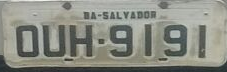

In [72]:
crop_sample = sample_im.crop(sample_out[0].boxes.xyxy[0].detach().cpu().numpy())
crop_sample

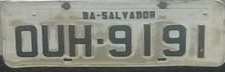

In [73]:
sample_im.crop(sample_out[0].boxes.xyxy[1].detach().cpu().numpy())

In [ ]:
from app.model impor t